In [ ]:
# Untuk 'menyembunyikan' warning
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

Menyimpan dataset di Github dan mengakses dataset dari link raw data di Github tersebut.

In [ ]:
url = 'https://raw.githubusercontent.com/andriansyahp/DatasetStaterPR3/master/camera_dataset.csv'
df = pd.read_csv(url)

### Analisis dan Kesimpulan

Berikanlah analisis dari hasil pekerjaan Anda dan berilah kesimpulan. Analisis dapat berupa evaluasi, hasil pengolahan, atau lainnya. Konten pada bagian kesimpulan minimal mengandung ringkasan analisis & apa sajakah yang telah Anda pelajari dalam mengerjakan soal ini

Melihat contoh data yang ada dalam dataset.

In [ ]:
# Mengambil 5 row secara acak
df.sample(5, random_state=1)

,Model,Release date,Max resolution,Low resolution,Effective pixels,Zoom wide (W),Zoom tele (T),Normal focus range,Macro focus range,Storage included,Weight (inc. batteries),Dimensions,Price
589,Olympus C-5060 Zoom,2003,2592.0,2288.0,5.0,27.0,110.0,80.0,3.0,32.0,480.0,116.0,449.0
718,Panasonic Lumix DMC-L1,2006,3136.0,2560.0,7.0,0.0,0.0,0.0,0.0,0.0,606.0,146.0,1499.0
677,Olympus Stylus 740,2006,3072.0,2560.0,7.0,36.0,180.0,70.0,3.0,17.0,160.0,96.0,229.0
957,Sony DSC-P93,2004,2592.0,2048.0,5.0,38.0,114.0,50.0,10.0,32.0,236.0,117.0,429.0
314,HP Photosmart C215,2000,1280.0,640.0,1.0,43.0,43.0,60.0,10.0,4.0,290.0,124.0,179.0


Melihat informasi tentang dataset terkait jumlah kolom, jumlah baris, tipe data tiap kolom, dan lainnya.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1038 entries, 0 to 1037
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Model                    1038 non-null   object 
 1   Release date             1038 non-null   int64  
 2   Max resolution           1038 non-null   float64
 3   Low resolution           1038 non-null   float64
 4   Effective pixels         1038 non-null   float64
 5   Zoom wide (W)            1038 non-null   float64
 6   Zoom tele (T)            1038 non-null   float64
 7   Normal focus range       1038 non-null   float64
 8   Macro focus range        1037 non-null   float64
 9   Storage included         1036 non-null   float64
 10  Weight (inc. batteries)  1036 non-null   float64
 11  Dimensions               1036 non-null   float64
 12  Price                    1038 non-null   float64
dtypes: float64(11), int64(1), object(1)
memory usage: 105.5+ KB


Melihat statistik deskriptif sederhana dari tiap kolom yang berisi jumlah, rerata, standar deviasi, nilai minimum dan maksimum, median serta kuartil.

In [ ]:
df.describe()

,Release date,Max resolution,Low resolution,Effective pixels,Zoom wide (W),Zoom tele (T),Normal focus range,Macro focus range,Storage included,Weight (inc. batteries),Dimensions,Price
count,1038.000000,1038.000000,1038.000000,1038.000000,1038.000000,1038.000000,1038.000000,1037.000000,1036.000000,1036.000000,1036.000000,1038.000000
mean,2003.590559,2474.672447,1773.936416,4.596339,32.963391,121.525048,44.145472,7.787850,17.447876,319.265444,105.363417,457.384393
std,2.724755,759.513608,830.897955,2.844044,10.333149,93.455422,24.141959,8.100081,27.440655,260.410137,24.262761,760.452918
min,1994.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000
25%,2002.000000,2048.000000,1120.000000,3.000000,35.000000,96.000000,30.000000,3.000000,8.000000,180.000000,92.000000,149.000000
50%,2004.000000,2560.000000,2048.000000,4.000000,36.000000,108.000000,50.000000,6.000000,16.000000,226.000000,101.000000,199.000000
75%,2006.000000,3072.000000,2560.000000,7.000000,38.000000,117.000000,60.000000,10.000000,20.000000,350.000000,115.000000,399.000000
max,2007.000000,5616.000000,4992.000000,21.000000,52.000000,518.000000,120.000000,85.000000,450.000000,1860.000000,240.000000,7999.000000


Melihat jumlah data yang berupa NaN (not a number). Diketahui bahwa terdapat 7 data yang berupa NaN yang tersebar di kolom 'Macro focus range', 'Storage included', 'Weight (inc. batteries)' dan 'Dimensions'.

In [ ]:
df.isnull().sum()

Model                      0
Release date               0
Max resolution             0
Low resolution             0
Effective pixels           0
Zoom wide (W)              0
Zoom tele (T)              0
Normal focus range         0
Macro focus range          1
Storage included           2
Weight (inc. batteries)    2
Dimensions                 2
Price                      0
dtype: int64

Mengetahui jumlah nilai unique di tiap kolom. Diketahui bahwa 'Model' dapat dianggap sebagai identifier dari data tiap row.

In [ ]:
df.nunique()

Model                      1038
Release date                 14
Max resolution               99
Low resolution               70
Effective pixels             16
Zoom wide (W)                25
Zoom tele (T)               100
Normal focus range           32
Macro focus range            29
Storage included             44
Weight (inc. batteries)     237
Dimensions                  101
Price                        43
dtype: int64

Melihat row-row yang mengandung data NaN. Diketahui bahwa 7 nilai NaN yang diketahui sebelumnya ternyata berada di 2 row, yaitu row 345 dan 346.

In [ ]:
df[df.isnull().any(axis=1)]

,Model,Release date,Max resolution,Low resolution,Effective pixels,Zoom wide (W),Zoom tele (T),Normal focus range,Macro focus range,Storage included,Weight (inc. batteries),Dimensions,Price
345,HP Photosmart R927,2006,3296.0,2592.0,8.0,35.0,105.0,50.0,10.0,NaN,NaN,NaN,179.0
346,HP Photosmart R937,2007,3298.0,0.0,8.0,39.0,118.0,50.0,NaN,NaN,NaN,NaN,179.0


Visualisasi keempat kolom yang mengandung nilai NaN dalam bentuk boxplot. Diketahui bahwa 'Weight' memiliki banyak outlier.

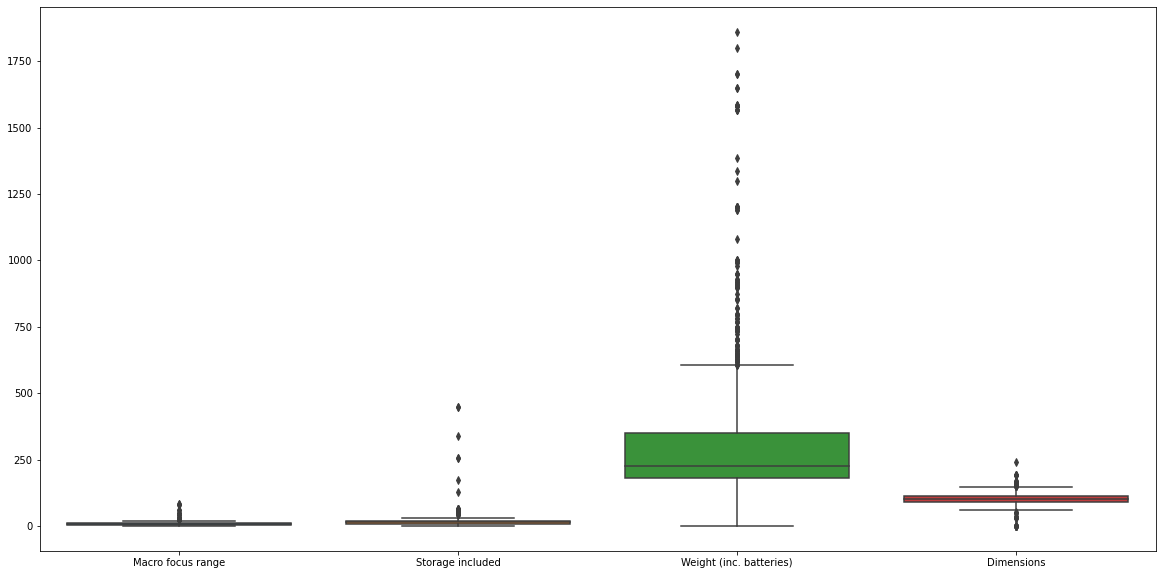

In [ ]:
fig=plt.gcf()
fig.set_size_inches(20,10)
sns.boxplot(data = df[['Macro focus range','Storage included', 'Weight (inc. batteries)', 'Dimensions']])

Karena hanya ada dua row yang mengandung nilai NaN, awalnya saya ingin melakukan drop terhadap dua row tersebut. Namun untuk kepentingan belajar dan mempertahankan nilai-nilai lainnya yang tidak NaN di row tersebut akhirnya saya memilih melakukan filling. Untuk 'Macro focus range' dan 'Storage included' di-fill berdasarkan modus, 'Dimensions' dengan mean sedangkan 'Weight (inc. batteries)' menggunakan median.

In [ ]:
df['Macro focus range'].fillna(df['Macro focus range'].mode()[0], inplace=True)
df['Storage included'].fillna(df['Storage included'].mode()[0], inplace=True)
df['Weight (inc. batteries)'].fillna(df['Weight (inc. batteries)'].median(), inplace=True)
df['Dimensions'].fillna(df['Dimensions'].mean(), inplace=True)

Melihat lagi jumlah data yang bernilai NaN. Setelah di-fill, sudah tidak ada data yang bernilai NaN.

In [ ]:
df.isnull().sum()

Model                      0
Release date               0
Max resolution             0
Low resolution             0
Effective pixels           0
Zoom wide (W)              0
Zoom tele (T)              0
Normal focus range         0
Macro focus range          0
Storage included           0
Weight (inc. batteries)    0
Dimensions                 0
Price                      0
dtype: int64

Melihat visualisasi korelasi antar fitur melalui heatmap dari seaborn. Korelasi digunakan dalam standar penentuan fitur mana yang ingin dijadikan independent variable. Dependent variable yang dipilih adalah 'Price'. Berdasarkan heatmap, didapatkan 'Zoom Wide (W)' dengan nilai korelasi -0.46 dan 'Weight (inc. batteries)' dengan nilai korelasi 0.46 merupakan fitur dengan korelasi tertinggi terhadap 'Price'. Namun, berdasarkan rasionalisasi menurut saya lebih logis jika harga sebuah kamera ditentukan berdasarkan lensa zoom wide dibandingkan berdasarkan beratnya. Selain itu, korelasi 'Zoom Wide (W)' dengan fitur lainnya juga relatif lebih tinggi dibandingkan 'Weight (inc. batteries)'. Sehingga, dipilih 'Zoom Wide (W)' sebagai independent variable.

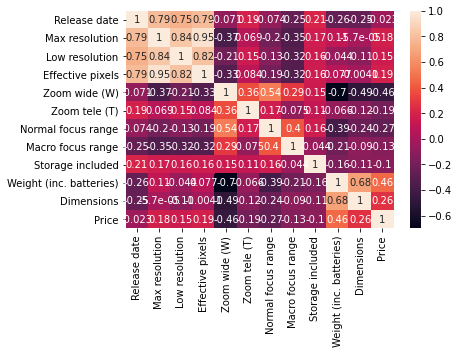

In [ ]:
fig.set_size_inches(15, 7)
sns.heatmap(data = df.corr(), annot=True, cbar=True)

Membuat dataframe baru untuk menampung independent dan dependent variable.

In [ ]:
compare_df = df[['Zoom wide (W)', 'Price']]

Melakukan scaling dengan MinMaxScaler dari scikit-learn.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

minmax = MinMaxScaler()
transformed = minmax.fit_transform(compare_df)

compare_df.iloc[:,:] = transformed
compare_df.head()

,Zoom wide (W),Price
0,0.730769,0.020664
1,0.730769,0.020664
2,0.865385,0.020664
3,0.673077,0.031935
4,0.826923,0.160927


Menggunakan Cross Validation (CV) dengan K-fold yang di-split menjadi 5 bagian. CV dipilih dibandingkan train_test_split karena dirasa lebih menyeluruh sehingga dapat lebih reliable dibanding train_test_split.

Selain itu, digunakan juga root mean square error (RMSE) sebagai metrics pengukuran error yang dihasilkan prediksi. Dari perhitungan didapatkan rerata RMSE dari 5-fold CV linear regression setelah dilakukan MinMaxScaling adalah sekitar ~ 0.08, yang mengindikasikan prediksi yang dihasilkan cukup akurat.

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

X = compare_df["Zoom wide (W)"].values
X = X.reshape(-1,1)
Y = compare_df["Price"].values

lr = LinearRegression()
kf = KFold(shuffle = True,  n_splits=5)
error = 0

for train_index, test_index in kf.split(X):
    X_train, X_valid = X[train_index], X[test_index]
    y_train, y_valid = Y[train_index], Y[test_index]
        
    lr.fit(X_train, y_train)
    
    predicted = lr.predict(X_valid)

    rmse = np.sqrt(mean_squared_error(y_valid, predicted))

    print('RMSE:', np.sqrt(mean_squared_error(y_valid, predicted)))
    error += np.sqrt(mean_squared_error(y_valid, predicted))

print("Average RMSE:", error/5)

RMSE: 0.045705030165725344
RMSE: 0.08233194866714778
RMSE: 0.09293839014579343
RMSE: 0.07525841084361162
RMSE: 0.11602397914047076
Average RMSE: 0.08245155179254979


Visualisasi data beserta garis regresi hasil prediksi. Terlihat bahwa garis yang dihasilkan cukup representatif dan secara intuitif terlihat dapat membagi sesuai dengan distribusi data dalam scatter plot.

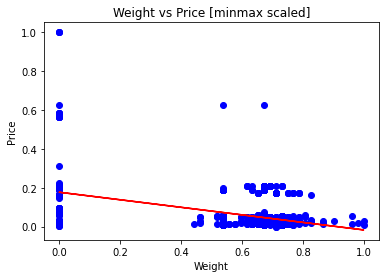

In [ ]:
plt.scatter(X, Y, color = "blue")
plt.plot(X, lr.predict(X), color = "red")
plt.title("Weight vs Price [minmax scaled]")
plt.xlabel("Weight")
plt.ylabel("Price")
plt.show()

**KESIMPULAN** <br/>
Berdasarkan hasil percobaan di atas, diketahui bahwa 'Zoom Wide (W)' merupakan salah satu fitur yang cukup prediktif untuk melakukan prediksi terhadap fitur 'Price'. Hal ini dapat dilihat dari RMSE yang dihasilkan setelah dilakukan Cross Validation 5-fold terhadap data yang telah di-MinMaxScaling menghasilkan nilai sekitar 0.08. Selain itu, hasil garis regresi yang diprediksi berdasarkan fitting data terhadap linear regression model juga terlihat dapat menggambarkan data dengan baik berdasarkan distribusinya dalam scatter plot.